<a href="https://colab.research.google.com/github/obinnachike/Car_brand_Identification/blob/main/Car_Brand_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Softmax, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from glob import glob
from tensorflow.keras import regularizers


In [ ]:
image_size = [224,224]
valid_path = "/content/drive/MyDrive/dataset/Images/Test"
train_path = "/content/drive/MyDrive/dataset/Images/Train"

CREATING THE MODEL AND ASSIGNING WEIGHTS

In [ ]:
resnet = ResNet50(include_top = False, input_shape = image_size+[3], weights = "imagenet")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


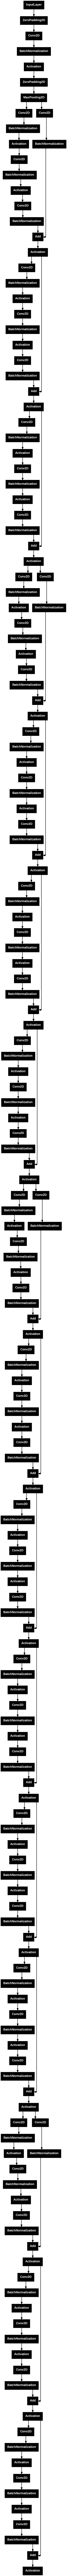

In [ ]:
plot_model(resnet)

In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob("/content/drive/MyDrive/dataset/Images/Train/*")
folders

['/content/drive/MyDrive/dataset/Images/Train/lamborghini',
 '/content/drive/MyDrive/dataset/Images/Train/audi',
 '/content/drive/MyDrive/dataset/Images/Train/mercedes']

In [ ]:
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=predictions)



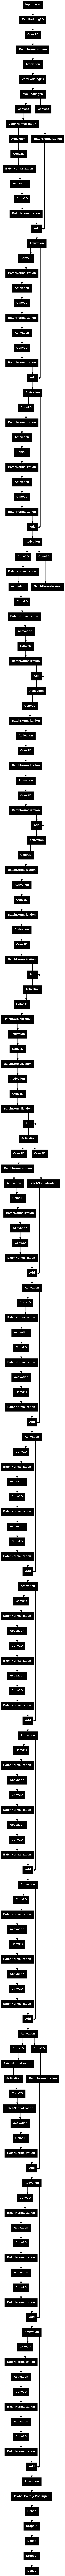

In [ ]:
plot_model(model)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,145,539 (92.11 MB)

 Trainable params: 557,827 (2.13 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/dataset/Images/Train",
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/dataset/Images/Test",
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
res_model = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.4062 - loss: 3.7573 - val_accuracy: 0.3448 - val_loss: 3.7515
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 833ms/step - accuracy: 0.3229 - loss: 3.8290 - val_accuracy: 0.3276 - val_loss: 3.7247
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 764ms/step - accuracy: 0.3646 - loss: 3.7299 - val_accuracy: 0.2069 - val_loss: 3.6970
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step - accuracy: 0.4062 - loss: 3.6697 - val_accuracy: 0.1897 - val_loss: 3.6691
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 831ms/step - accuracy: 0.3229 - loss: 3.7556 - val_accuracy: 0.1897 - val_loss: 3.6373
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.4375 - loss: 3.6159 - val_accuracy: 0.1897 - val_loss: 3.6062
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.3229 - loss: 3.6393 - val_accuracy: 0.1897 - val_loss: 3.5757
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step - accuracy: 0.4479 - loss: 3.5304 - val_accuracy: 0.2069 - val_loss: 3.5428

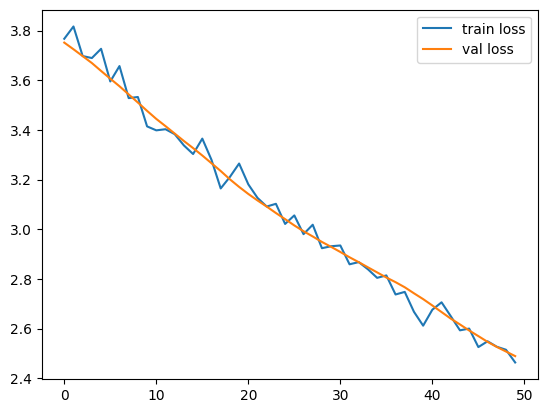

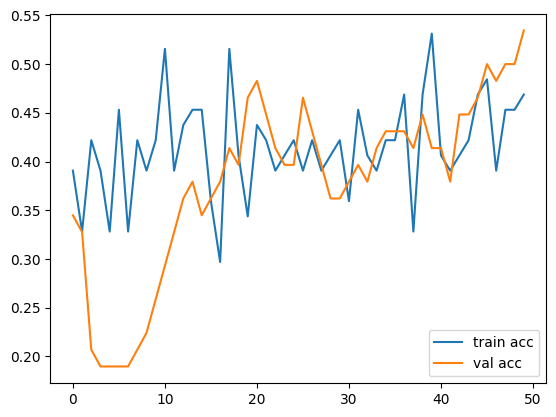

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(res_model.history['loss'], label = 'train loss')
plt.plot(res_model.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(res_model.history['accuracy'], label = 'train acc')
plt.plot(res_model.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(test_set)

1/2 ━━━━━━━━━━━━━━━━━━━━ 3s 4s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step


In [ ]:
print(training_set.class_indices)


{'audi': 0, 'lamborghini': 1, 'mercedes': 2}


In [ ]:
loss, acc = model.evaluate(test_set)
print(f"\nTest accuracy: {acc:.2%}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.5230 - loss: 2.4961

Test accuracy: 53.45%


In [ ]:
import os

for class_name in os.listdir(train_path):
    class_folder = os.path.join(train_path, class_name)
    print(f"{class_name}: {len(os.listdir(class_folder))} images")


lamborghini: 19 images
audi: 20 images
mercedes: 25 images


In [ ]:
class_labels = {0: "audi", 1: "lamborghini", 2: "mercedes"}

# Load and preprocess image
img_path = '/content/drive/MyDrive/dataset/Images/Test/audi/21.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)  # Must match training preprocessing

# Predict
pred = model.predict(x)
pred_index = np.argmax(pred, axis=1)[0]
result = f"The car is {class_labels[pred_index]}"
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
The car is audi


In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/dataset/Images/Test/audi/21.jpg', target_size = (224, 224))

In [ ]:
x = x/255

In [ ]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
x = image.img_to_array(img)
x = x/255
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
preds = model.predict(x)
preds = np.argmax(preds, axis = 1)
if preds == 1:
    preds ="The car is audi"
elif preds == 2:
    preds ="The car is Lamborghini"
else:
    preds == "The car is Mercedes"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [ ]:
print(preds)

The car is Lamborghini
